### Exercise: Traditional Image Feature Extraction
Read through the exercises and implement the solutions below. Feel free to reuse code from jupyter notebook 07_Traditional_Feature_Extraction

#### Exercise 1.1
The goal of this and the following exercise is to become more familiar with SIFT by visualizing keypoints.
First, let's compare the keypoints of an image to itself. This is how a perfect match would look like.

* Load any image from the "Data" folder
* Extract SIFT features from the image
* Visualize the keypoint mapping from the image to itself

In [1]:
# Function for plotting opencv images in jupyter notebook
from PIL import Image
from IPython.display import display
import cv2
import matplotlib.pyplot as plt

def display_array(array):
    if len(array.shape) > 2: # Check whether image is colored
        array = cv2.cvtColor(array.astype("uint8"), cv2.COLOR_BGR2RGB) # Swap BGR to RGB
    pil_img = Image.fromarray(array)
    display(pil_img)

In [2]:
def display_keypoints(img1, img2, descriptors1, descriptors2, keypoints1, keypoints2, ratio_best_matches=1):
    """Display matched key points of two images"""
    
    # Display number of keypoints detected
    print("Key points detected in image 1: ", len(keypoints1))
    print("Key points detected in image 2: ", len(keypoints2))
    
    # Initialize brute force matcher
    matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    # Match descriptors of the two images 
    matches = matcher.match(descriptors1, descriptors2)

    # Order matches by distance
    matches = sorted(matches, key=lambda x : x.distance)
    
    # Remove worst matches
    num_best_matches = int(round(len(matches) * ratio_best_matches, 0))
    print(num_best_matches)
    matches = matches[:num_best_matches]

    # Create drawing of matched key points
    result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, img2, flags = 2)

    # Display the best matching points
    plt.rcParams["figure.figsize"] = [20.0, 10.0]
    plt.imshow(result)
    plt.show()

    # Display number of matched key points
    print("Number of matched key points: ", len(matches))

In [3]:
path = "Data/puppy4.jpg"
img = cv2.imread(path, 0)

if img is None:
    raise Exception("Error: Cannot load image from path '{}'".format(path))

In [4]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(img, None)

Key points detected in image 1:  843
Key points detected in image 2:  843
42


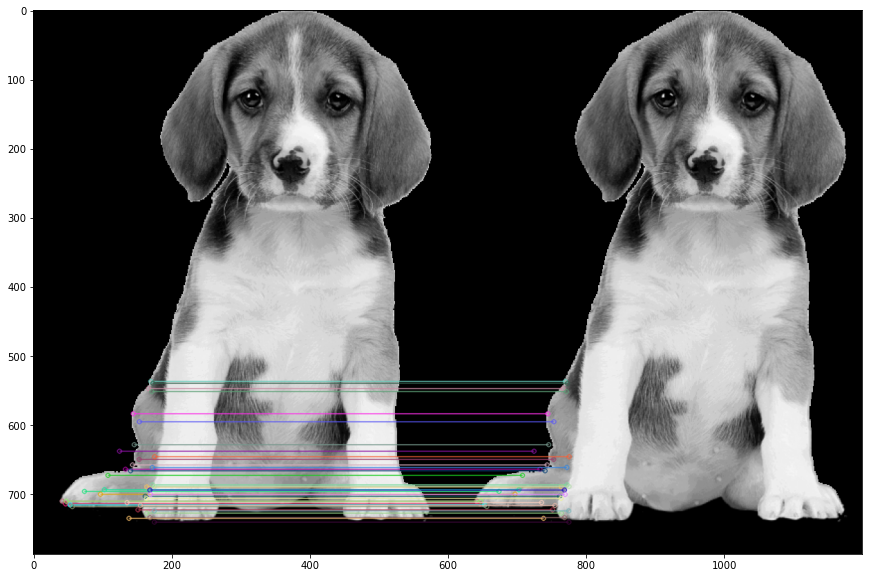

Number of matched key points:  42


In [5]:
display_keypoints(img, img, descriptors, descriptors, keypoints, keypoints, 0.05)

#### Exercise 1.2
Next, you will disort the image and investigate the change in the matched keypoints. The keypoints usually get much less compared to self-matching. However, there should still be many matching keypoints as SIFT is relatively invariant to rotations and resizing.

* Use the same image as in exercise 1.1
* Make a copy of the original image
* Rotate and rescale the copied image
* Extract SIFT features from the transformed image
* Map the keypoints of the original to the extracted keypoints of the disorted image

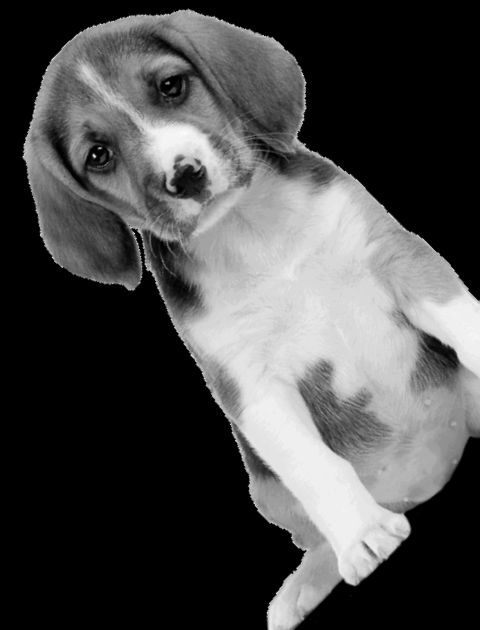

In [6]:
rot_img = img

resized_img = cv2.resize(img, None, fx=0.8, fy=0.8,interpolation = cv2.INTER_CUBIC)

rows,cols = resized_img.shape[:2]

rot_matrix = cv2.getRotationMatrix2D(center=(cols/2, rows/2), angle=45, scale=1)
rot_img = cv2.warpAffine(resized_img, rot_matrix, (cols, rows))

display_array(rot_img)

Key points detected in image 1:  843
Key points detected in image 2:  644
23


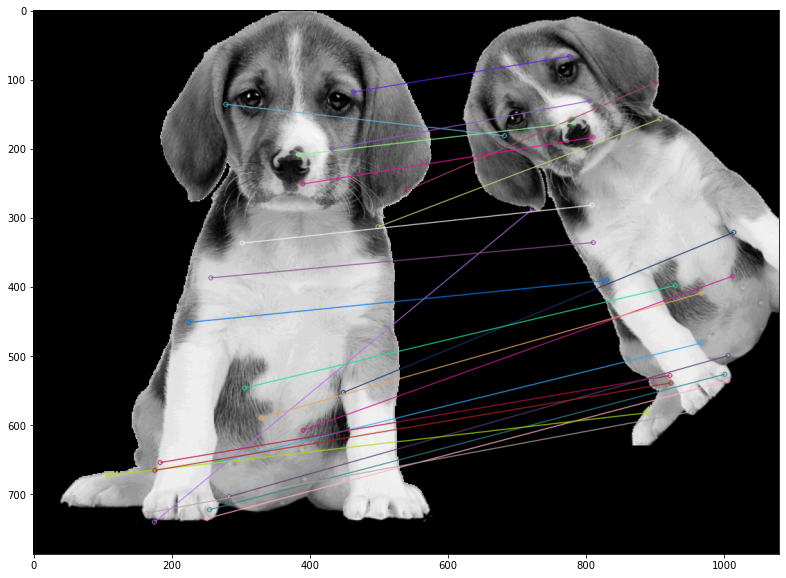

Number of matched key points:  23


In [7]:
sift = cv2.xfeatures2d.SIFT_create()
rot_keypoints, rot_descriptors = sift.detectAndCompute(rot_img, None)
                                                       
display_keypoints(img, rot_img, descriptors, rot_descriptors, keypoints, rot_keypoints, 0.05)

#### Exercise 1.3
Lastly, compare to different but semantically similar images.

* Load the files "kitten1.png" and "kitten5.png" from the data folder
* Extract SIFT features from both images
* Visualize the matched keypoints

In [8]:
path1 = "Data/kitten1.jpg"
path2 = "Data/kitten5.jpg"

img1 = cv2.imread(path1, 0)
img2 = cv2.imread(path2, 0)

if img1 is None:
    raise Exception("Error: Cannot load image from path '{}'".format(path1))
if img2 is None:
    raise Exception("Error: Cannot load image from path '{}'".format(path2))

In [9]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

Key points detected in image 1:  369
Key points detected in image 2:  12652
15


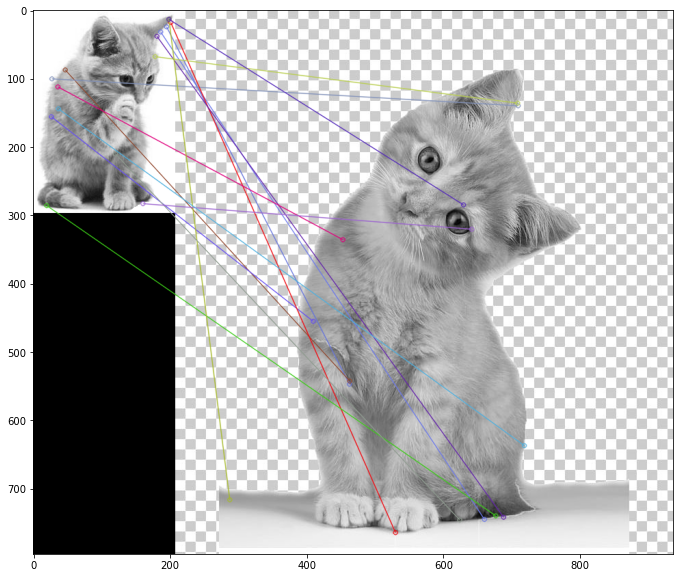

Number of matched key points:  15


In [10]:
display_keypoints(img1, img2, descriptors1, descriptors2, keypoints1, keypoints2, 0.05)